In [51]:
import pandas as pd
#import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
import scipy
import sklearn
import copy
from tabulate import tabulate

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/Project/AzureDataset_FunctionCalls/'
DATASET_PATH = '/content/drive/MyDrive/Project/AzureDataset_FunctionCalls/k6csv/'
Baseline_DATA_PATH = '/content/drive/MyDrive/Project/AzureDataset_FunctionCalls/k6csv/Baselines/'
Aggregate_DATA_PATH = '/content/drive/MyDrive/Project/AzureDataset_FunctionCalls/k6csv/Aggregates/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import time

#csvName = '14456d07da6db5da228beff3ad356f824e4cd09a8d6771089eb26a862526ac9a'
#csvName = 'cd05d7b4445349ee645ea290586fd28c0c675a155eb1522485535c5c0329a908'
csvName = '36bc568292ec360f9cc2f4431fa0db953ce8714cdb1b165f4ec68ca54e7fe2be'

multiSeriesMain = pd.read_csv(DATA_PATH+csvName+'.csv')
multiSeriesMain = multiSeriesMain.loc[:, ~multiSeriesMain.columns.str.contains('^Unnamed')].astype(float).reset_index(drop=True)

In [53]:
split = True
if split:
  csvName = 'bogo1445'
  csvArray = pd.read_csv(Baseline_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
  bogoArray = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
  csvName = 'bubble1445'
  csvArray = pd.read_csv(Baseline_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
  bubbleArray = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
else:
  csvName = '24Hour'
  csvArray = pd.read_csv(Baseline_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
  bogoArray = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
  bubbleArray = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)

In [54]:
startTime = int(bubbleArray[1].iloc[0:1])
endTime = int(bubbleArray[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
means = []
nintieth = []
ninetyNine = []

for i in range(maxTime):
  means.append(bubbleArray[2][(bubbleArray[1] >= startTime+60*(i)) & (bubbleArray[1] < startTime+60*(1+i))].mean())
  nintieth.append(bubbleArray[2][(bubbleArray[1] >= startTime+60*(i)) & (bubbleArray[1] < startTime+60*(1+i))].quantile(0.9))
  ninetyNine.append(bubbleArray[2][(bubbleArray[1] >= startTime+60*(i)) & (bubbleArray[1] < startTime+60*(1+i))].quantile(0.99))
bubbleBase = pd.DataFrame(np.array([means,nintieth,ninetyNine]), index = ['mean', '90','99'])

startTime = int(bogoArray[1].iloc[0:1])
endTime = int(bogoArray[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
means = []
nintieth = []
ninetyNine = []

for i in range(maxTime):
  means.append(bogoArray[2][(bogoArray[1] >= startTime+60*(i)) & (bogoArray[1] < startTime+60*(1+i))].mean())
  nintieth.append(bogoArray[2][(bogoArray[1] >= startTime+60*(i)) & (bogoArray[1] < startTime+60*(1+i))].quantile(0.9))
  ninetyNine.append(bogoArray[2][(bogoArray[1] >= startTime+60*(i)) & (bogoArray[1] < startTime+60*(1+i))].quantile(0.99))
bogoBase = pd.DataFrame(np.array([means,nintieth,ninetyNine]), index = ['mean', '90','99'])

In [93]:
csvName = '24Hour1min5Clust1445'
csvName2 = '24Hour1min5Clust1445_2'

csvArray = pd.read_csv(Aggregate_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])

bogoArrayClust = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
bubbleArrayClust = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)

clusterIndices = [[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439], [0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 242, 244, 245, 246, 249, 251, 252, 253, 254, 255, 256, 257, 258, 259, 261, 262, 263, 264, 265, 266, 267, 269, 270, 272, 273, 274, 275, 276, 277, 278, 279, 280, 282, 284, 285, 286, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 482, 483, 484, 485, 486, 487, 489, 490, 503, 504, 505, 509, 510, 516, 517, 519, 520, 521, 522, 524, 525, 526, 527, 529, 530, 531, 535, 536, 537, 538, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 777, 778, 779, 960, 961, 962, 963, 964, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1200, 1201, 1202, 1204, 1205, 1207, 1208, 1209, 1212, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1225, 1227, 1228, 1229, 1232, 1233, 1235, 1236, 1237, 1238, 1239, 1241, 1242, 1243, 1245, 1247, 1248, 1249, 1252, 1253, 1255, 1256, 1257, 1258, 1259], [492, 501, 512, 532, 965, 1210], [2, 966], [1, 31, 39, 240, 241, 243, 247, 248, 250, 260, 268, 271, 281, 283, 287, 480, 481, 488, 491, 493, 494, 495, 496, 497, 498, 499, 500, 502, 506, 507, 508, 511, 513, 514, 515, 518, 523, 528, 533, 534, 539, 731, 776, 1203, 1206, 1211, 1213, 1224, 1226, 1230, 1231, 1234, 1240, 1244, 1246, 1250, 1251, 1254]]
windowSize = 1
warmup = 5
warmupR = 5
timeR = windowSize+warmup+1

<ipython-input-93-80bb777a94fe>:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  csvArray = pd.read_csv(Aggregate_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])


In [94]:
startTime = int(bubbleArrayClust[1].iloc[0:1])
endTime = int(bubbleArrayClust[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
means = []
nintieth = []
ninetyNine = []

for i in range(maxTime):
  means.append(bubbleArrayClust[2][(bubbleArrayClust[1] >= startTime+60*(i)) & (bubbleArrayClust[1] < startTime+60*(1+i))].mean())
  nintieth.append(bubbleArrayClust[2][(bubbleArrayClust[1] >= startTime+60*(i)) & (bubbleArrayClust[1] < startTime+60*(1+i))].quantile(0.9))
  ninetyNine.append(bubbleArrayClust[2][(bubbleArrayClust[1] >= startTime+60*(i)) & (bubbleArrayClust[1] < startTime+60*(1+i))].quantile(0.99))
bubbleClust = pd.DataFrame(np.array([means,nintieth,ninetyNine]), index = ['mean', '90','99'])

startTime = int(bogoArrayClust[1].iloc[0:1])
endTime = int(bogoArrayClust[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
means = []
nintieth = []
ninetyNine = []

for i in range(maxTime):
  means.append(bogoArrayClust[2][(bogoArrayClust[1] >= startTime+60*(i)) & (bogoArrayClust[1] < startTime+60*(1+i))].mean())
  nintieth.append(bogoArrayClust[2][(bogoArrayClust[1] >= startTime+60*(i)) & (bogoArrayClust[1] < startTime+60*(1+i))].quantile(0.9))
  ninetyNine.append(bogoArrayClust[2][(bogoArrayClust[1] >= startTime+60*(i)) & (bogoArrayClust[1] < startTime+60*(1+i))].quantile(0.99))
bogoClust = pd.DataFrame(np.array([means,nintieth,ninetyNine]), index = ['mean', '90','99'])

if csvName2:
  csvArray = pd.read_csv(Aggregate_DATA_PATH+csvName2+'.csv', header=None, usecols=[0,1,2,])

  bogoArrayClust2 = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
  bubbleArrayClust2 = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)

  startTime = int(bubbleArrayClust2[1].iloc[0:1])
  endTime = int(bubbleArrayClust2[1].iloc[-1])
  maxTime = round((endTime-startTime)/60)
  means = []
  nintieth = []
  ninetyNine = []

  for i in range(maxTime):
    means.append(bubbleArrayClust2[2][(bubbleArrayClust2[1] >= startTime+60*(i)) & (bubbleArrayClust2[1] < startTime+60*(1+i))].mean())
    nintieth.append(bubbleArrayClust2[2][(bubbleArrayClust2[1] >= startTime+60*(i)) & (bubbleArrayClust2[1] < startTime+60*(1+i))].quantile(0.9))
    ninetyNine.append(bubbleArrayClust2[2][(bubbleArrayClust2[1] >= startTime+60*(i)) & (bubbleArrayClust2[1] < startTime+60*(1+i))].quantile(0.99))
  bubbleClust2 = pd.DataFrame(np.array([means,nintieth,ninetyNine]), index = ['mean', '90','99'])

  startTime = int(bogoArrayClust2[1].iloc[0:1])
  endTime = int(bogoArrayClust2[1].iloc[-1])
  maxTime = round((endTime-startTime)/60)
  means = []
  nintieth = []
  ninetyNine = []

  for i in range(maxTime):
    means.append(bogoArrayClust2[2][(bogoArrayClust2[1] >= startTime+60*(i)) & (bogoArrayClust2[1] < startTime+60*(1+i))].mean())
    nintieth.append(bogoArrayClust2[2][(bogoArrayClust2[1] >= startTime+60*(i)) & (bogoArrayClust2[1] < startTime+60*(1+i))].quantile(0.9))
    ninetyNine.append(bogoArrayClust2[2][(bogoArrayClust2[1] >= startTime+60*(i)) & (bogoArrayClust2[1] < startTime+60*(1+i))].quantile(0.99))
  bogoClust2 = pd.DataFrame(np.array([means,nintieth,ninetyNine]), index = ['mean', '90','99'])

<ipython-input-94-98926af8bfd1>:28: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  csvArray = pd.read_csv(Aggregate_DATA_PATH+csvName2+'.csv', header=None, usecols=[0,1,2,])


In [95]:
print(bogoClust)

             0          1          2          3          4           5   6   \
mean  15.331721  14.493680  14.148678  14.019621  14.663099   17.662848 NaN   
90    16.033978  14.899196  14.514685  14.370019  14.769727   37.378425 NaN   
99    24.049932  17.165640  15.520474  15.083331  42.766357  100.913611 NaN   

             7          8          9   ...         24          25          26  \
mean  15.629614  14.601013  14.219608  ...  14.385718   19.766802   82.272287   
90    16.434678  15.093061  14.562718  ...  15.264992   15.372792  263.480007   
99    19.412797  16.202545  15.879018  ...  16.087720  135.725649  566.963180   

      27         28         29         30         31          32          33  
mean NaN  15.382836  14.544044  15.064723  14.395081   18.220834   32.440146  
90   NaN  16.234537  15.019386  15.523589  15.167951   14.786034  102.144191  
99   NaN  20.187576  16.626043  16.893840  16.199269  125.961359  238.599447  

[3 rows x 34 columns]


<Axes: >

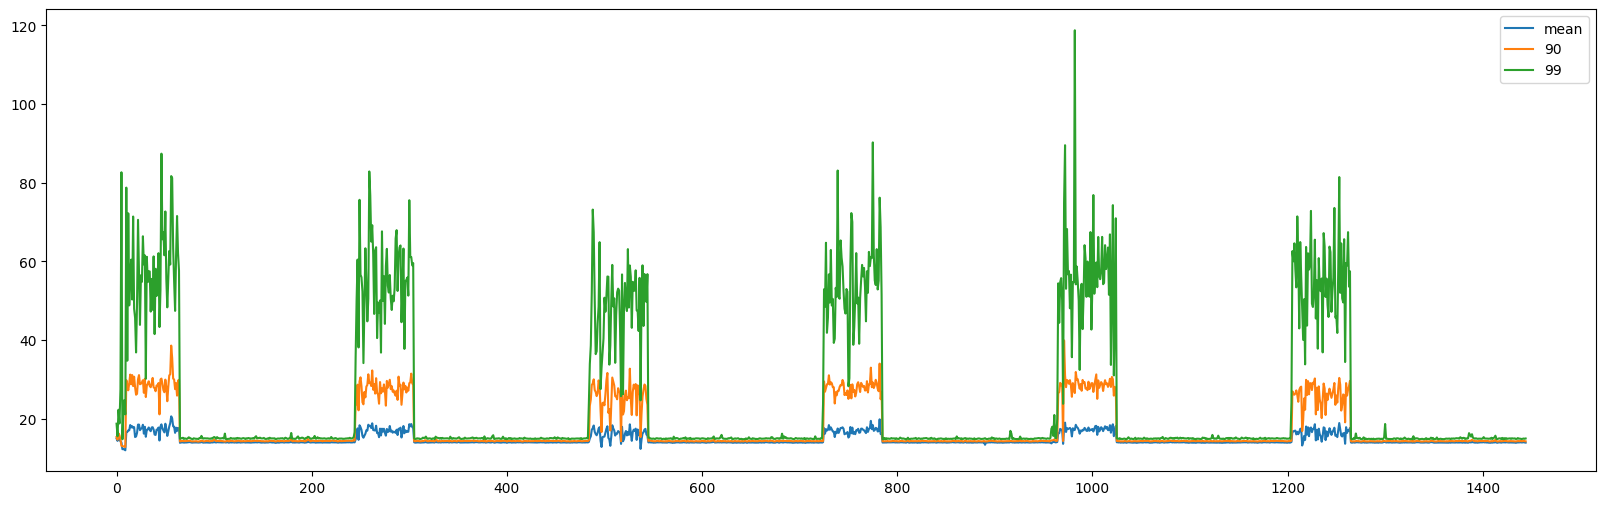

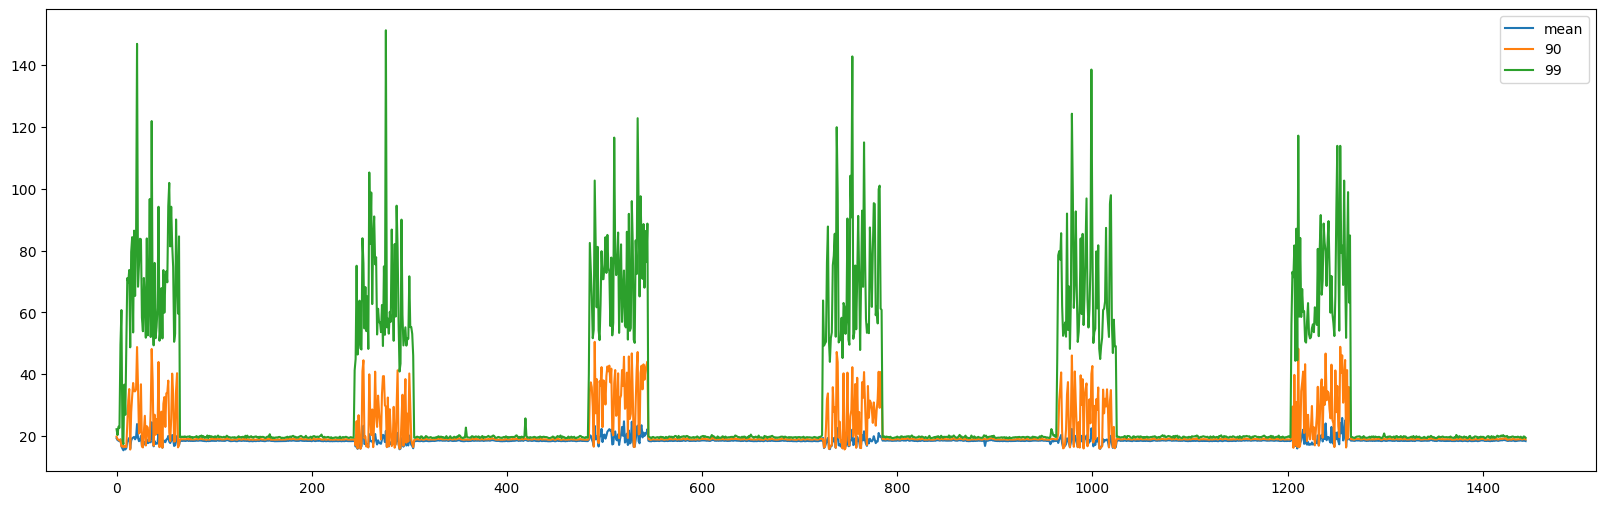

In [96]:
bogoBase.T.plot()
bubbleBase.T.plot()

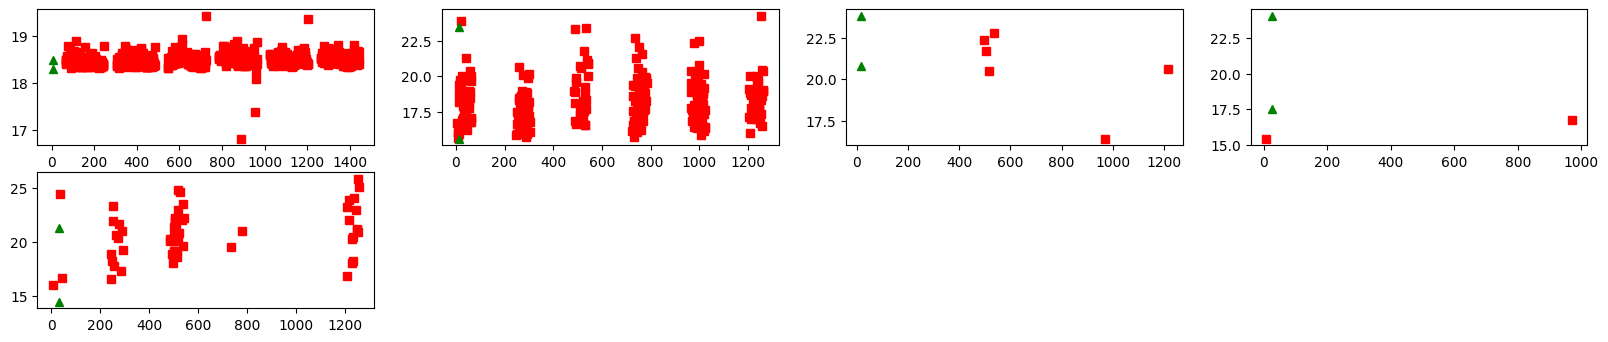

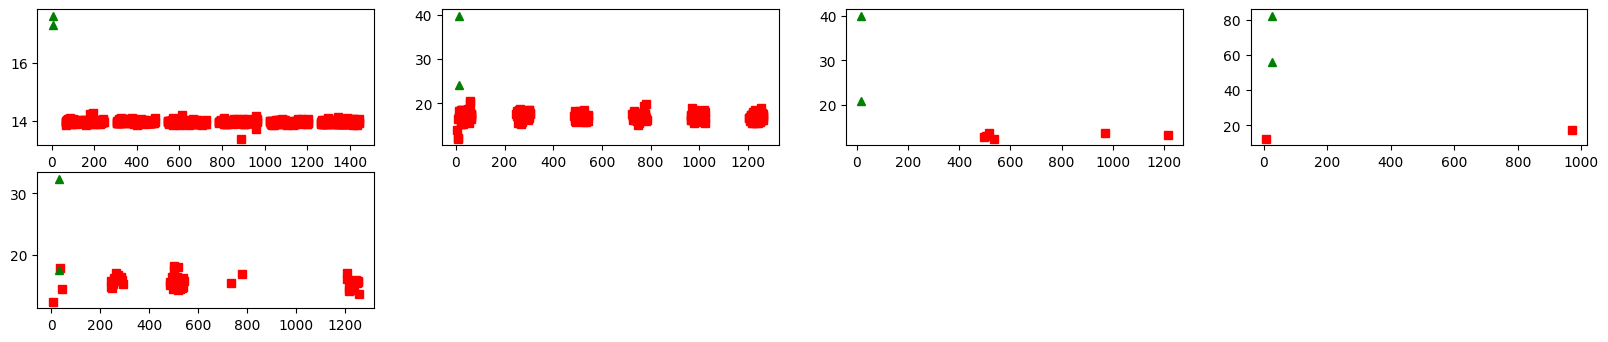

In [97]:
count = 0
for indices in clusterIndices:
  plt.subplot(3, 4, count+1)
  if count == 0:
    for i in indices:
      plt.plot(bubbleBase.T['mean'].iloc[warmup+i:warmup+i+windowSize], "rs")
      #plt.xticks(range(windowSize))
    plt.plot(bubbleClust.T['mean'].iloc[warmupR:warmupR+windowSize], 'g^')
    if csvName2:
      plt.plot(bubbleClust2.T['mean'].iloc[warmupR:warmupR+windowSize], 'g^')
    #plt.xticks(range(windowSize))
  else:
    for i in indices:
      plt.plot(bubbleBase.T['mean'].iloc[warmup+i:warmup+i+windowSize], "rs")
      #plt.xticks(range(windowSize))
    plt.plot(bubbleClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize], 'g^')
    if csvName2:
      plt.plot(bubbleClust2.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize], 'g^')
    #plt.xticks(range(windowSize))
  count += 1
plt.show()

count = 0
for indices in clusterIndices:
  plt.subplot(3, 4, count+1)
  if count == 0:
    for i in indices:
      plt.plot(bogoBase.T['mean'].iloc[warmup+i:warmup+i+windowSize], "rs")
      #plt.xticks(range(windowSize))
    plt.plot(bogoClust.T['mean'].iloc[warmupR:warmupR+windowSize], 'g^')
    if csvName2:
      plt.plot(bogoClust2.T['mean'].iloc[warmupR:warmupR+windowSize], 'g^')
    #plt.xticks(range(windowSize))
  else:
    for i in indices:
      plt.plot(bogoBase.T['mean'].iloc[warmup+i:warmup+i+windowSize], "rs")
      #plt.xticks(range(windowSize))
    plt.plot(bogoClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize], 'g^')
    if csvName2:
      plt.plot(bogoClust2.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize], 'g^')
    #plt.xticks(range(windowSize))
  count += 1
plt.show()

In [98]:
count = 0
bubbleBaseCI = []
bubbleClustCI = []
for indices in clusterIndices:
  if count == 0:
    temp = []
    for i in indices:
      a,b = scipy.stats.norm.interval(0.95, sum(bubbleBase.T['mean'].iloc[warmup+i:warmup+i+windowSize])/windowSize, np.std(bubbleBase.T['mean'].iloc[warmup+i:warmup+i+windowSize]))
      temp.append([a,b])
    bubbleBaseCI.append(temp)
    a,b = scipy.stats.norm.interval(0.95, sum(bubbleClust.T['mean'].iloc[warmupR:warmupR+windowSize])/windowSize, np.std(bubbleClust.T['mean'].iloc[warmupR:warmupR+windowSize]))
    bubbleClustCI.append([a,b])
  else:
    temp = []
    for i in indices:
      a,b = scipy.stats.norm.interval(0.95, sum(bubbleBase.T['mean'].iloc[warmup+i:warmup+i+windowSize])/windowSize, np.std(bubbleBase.T['mean'].iloc[warmup+i:warmup+i+windowSize]))
      temp.append([a,b])
    bubbleBaseCI.append(temp)
    a,b = scipy.stats.norm.interval(0.95, sum(bubbleClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize])/windowSize, np.std(bubbleClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize]))
    bubbleClustCI.append([a,b])
  count += 1
clustCoverage = []
baseCoverage = []
count = 0
for indices in clusterIndices:
  tempClust = []
  tempBase = []
  for i in range(len(indices)):
    clustCov = 0
    baseCov = 0
    clustLow = bubbleClustCI[count][0]
    clustHigh = bubbleClustCI[count][1]
    baseLow = bubbleBaseCI[count][i][0]
    baseHigh = bubbleBaseCI[count][i][1]
    if not(clustLow >= baseHigh or baseLow >= clustHigh):
      overlap = max(0, min(baseHigh, clustHigh) - max(baseLow, clustLow))
      length = baseHigh-baseLow + clustHigh-clustLow
      lengthB = baseHigh-baseLow
      lengthC = clustHigh-clustLow
      avg = 2*overlap/length
      clustCov = overlap/lengthB
      baseCov = overlap/lengthC
      tempClust.append(clustCov)
      tempBase.append(baseCov)
    else:
      tempClust.append(0)
      tempBase.append(0)
  clustCoverage.append(tempClust)
  baseCoverage.append(tempBase)
  count +=1
totalSumC = 0
totalSumB = 0
totalSumAvg = 0
tab = [["Clust2Data", "Data2Clust", "Average"]]
for clustList in range(len(clustCoverage)):
  tempSumC = 0
  tempSumB = 0
  for cov in range(len(clustCoverage[clustList])):
    tempSumC += clustCoverage[clustList][cov]
    tempSumB += baseCoverage[clustList][cov]
  tab.append([tempSumC/len(clustCoverage[clustList]), tempSumB/len(clustCoverage[clustList]), len(clusterIndices[clustList])/len(bubbleBase.T['mean'])])
  totalSumC += tempSumC/len(clustCoverage[clustList])*len(clusterIndices[clustList])/len(bubbleBase.T['mean'])
  totalSumB += tempSumB/len(clustCoverage[clustList])*len(clusterIndices[clustList])/len(bubbleBase.T['mean'])
  totalSumAvg += ((tempSumB/len(clustCoverage[clustList]) + tempSumC/len(clustCoverage[clustList]))/2) *len(clusterIndices[clustList])/len(bubbleBase.T['mean'])
print("Bubble")
print(tabulate(tab))
print("Cluster to Dataset Overlap:", totalSumC)
print("Dataset to Cluster Overlap:", totalSumB)
print("Average Overlap:", totalSumAvg)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


Bubble
----------  ----------  --------------------
Clust2Data  Data2Clust  Average
nan         nan         0.7474048442906575
nan         nan         0.20346020761245676
nan         nan         0.004152249134948097
nan         nan         0.001384083044982699
nan         nan         0.04013840830449827
----------  ----------  --------------------
Cluster to Dataset Overlap: nan
Dataset to Cluster Overlap: nan
Average Overlap: nan


In [99]:
count = 0
bogoBaseCI = []
bogoClustCI = []
for indices in clusterIndices:
  if count == 0:
    temp = []
    for i in indices:
      a,b = scipy.stats.norm.interval(0.95, sum(bogoBase.T['mean'].iloc[warmup+i:warmup+i+windowSize])/windowSize, np.std(bogoBase.T['mean'].iloc[warmup+i:warmup+i+windowSize]))
      temp.append([a,b])
    bogoBaseCI.append(temp)
    a,b = scipy.stats.norm.interval(0.95, sum(bogoClust.T['mean'].iloc[warmupR:warmupR+windowSize])/windowSize, np.std(bogoClust.T['mean'].iloc[warmupR:warmupR+windowSize]))
    bogoClustCI.append([a,b])
  else:
    temp = []
    for i in indices:
      a,b = scipy.stats.norm.interval(0.95, sum(bogoBase.T['mean'].iloc[warmup+i:warmup+i+windowSize])/windowSize, np.std(bogoBase.T['mean'].iloc[warmup+i:warmup+i+windowSize]))
      temp.append([a,b])
    bogoBaseCI.append(temp)
    a,b = scipy.stats.norm.interval(0.95, sum(bogoClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize])/windowSize, np.std(bogoClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize]))
    bogoClustCI.append([a,b])
  count += 1
clustCoverage = []
baseCoverage = []
count = 0
baseList = []
clustList = []
for indices in clusterIndices:
  tempClust = []
  tempBase = []
  baseLowest = 999
  baseHighest = 0
  for i in range(len(indices)):
    clustCov = 0
    baseCov = 0
    clustLow = bogoClustCI[count][0]
    clustHigh = bogoClustCI[count][1]
    baseLow = bogoBaseCI[count][i][0]
    baseHigh = bogoBaseCI[count][i][1]
    if baseLow < baseLowest:
      baseLowest = baseLow
    if baseHigh > baseHighest:
      baseHighest = baseHigh
    if not(clustLow >= baseHigh or baseLow >= clustHigh):
      overlap = max(0, min(baseHigh, clustHigh) - max(baseLow, clustLow))
      length = baseHigh-baseLow + clustHigh-clustLow
      lengthB = baseHigh-baseLow
      lengthC = clustHigh-clustLow
      avg = 2*overlap/length
      clustCov = overlap/lengthB
      baseCov = overlap/lengthC
      tempClust.append(clustCov)
      tempBase.append(baseCov)
    else:
      tempClust.append(0)
      tempBase.append(0)
  baseList.append([baseLowest,baseHighest])
  clustList.append([clustLow, clustHigh])
  clustCoverage.append(tempClust)
  baseCoverage.append(tempBase)
  count +=1
totalSumC = 0
totalSumB = 0
totalSumAvg = 0
tab = [["Clust2Data", "Data2Clust", "Average"]]
for clustList in range(len(clustCoverage)):
  tempSumC = 0
  tempSumB = 0
  for cov in range(len(clustCoverage[clustList])):
    tempSumC += clustCoverage[clustList][cov]
    tempSumB += baseCoverage[clustList][cov]
  tab.append([tempSumC/len(clustCoverage[clustList]), tempSumB/len(clustCoverage[clustList]), len(clusterIndices[clustList])/len(bubbleBase.T['mean'])])
  totalSumC += tempSumC/len(clustCoverage[clustList])*len(clusterIndices[clustList])/len(bubbleBase.T['mean'])
  totalSumB += tempSumB/len(clustCoverage[clustList])*len(clusterIndices[clustList])/len(bubbleBase.T['mean'])
  totalSumAvg += ((tempSumB/len(clustCoverage[clustList]) + tempSumC/len(clustCoverage[clustList]))/2) *len(clusterIndices[clustList])/len(bubbleBase.T['mean'])
print("Bogo")
print(tabulate(tab))
print("Cluster to Dataset Overlap:", totalSumC)
print("Dataset to Cluster Overlap:", totalSumB)
print("Average Overlap:", totalSumAvg)

Bogo
----------  ----------  --------------------
Clust2Data  Data2Clust  Average
nan         nan         0.7474048442906575
nan         nan         0.20346020761245676
nan         nan         0.004152249134948097
nan         nan         0.001384083044982699
nan         nan         0.04013840830449827
----------  ----------  --------------------
Cluster to Dataset Overlap: nan
Dataset to Cluster Overlap: nan
Average Overlap: nan


In [100]:
if csvName2:
  count = 0
  bubbleBaseCI = []
  bubbleClustCI = []
  for indices in clusterIndices:
    if count == 0:
      temp = []
      for i in indices:
        temp.append(bubbleBase.T['mean'].iloc[warmup+i:warmup+i+windowSize].values)
      a,b = scipy.stats.norm.interval(0.95, sum(temp)/(windowSize*len(indices)), np.std(temp))
      bubbleBaseCI.append([a,b])
      a,b = scipy.stats.norm.interval(0.95, sum([bubbleClust.T['mean'].iloc[warmupR:warmupR+windowSize].values,bubbleClust2.T['mean'].iloc[warmupR:warmupR+windowSize].values])/(windowSize*2), np.std([bubbleClust.T['mean'].iloc[warmupR:warmupR+windowSize].values,bubbleClust2.T['mean'].iloc[warmupR:warmupR+windowSize].values]))
      bubbleClustCI.append([a,b])
    else:
      temp = []
      for i in indices:
        temp.append(bubbleBase.T['mean'].iloc[warmup+i:warmup+i+windowSize].values)
      a,b = scipy.stats.norm.interval(0.95, sum(temp)/(windowSize*len(indices)), np.std(temp))
      if(len(indices)<2):
        a = 0
        b = 0
      bubbleBaseCI.append([a,b])
      a,b = scipy.stats.norm.interval(0.95, sum([bubbleClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].values,bubbleClust2.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].values])/(windowSize*2), np.std([bubbleClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].values,bubbleClust2.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].values]))
      bubbleClustCI.append([a,b])
    count += 1
  clustCoverage = []
  baseCoverage = []
  count = 0
  for indices in clusterIndices:
    tempClust = []
    tempBase = []
    clustCov = 0
    baseCov = 0
    clustLow = bubbleClustCI[count][0]
    clustHigh = bubbleClustCI[count][1]
    baseLow = bubbleBaseCI[count][0]
    baseHigh = bubbleBaseCI[count][1]
    if not(clustLow >= baseHigh or baseLow >= clustHigh):
      overlap = max(0, min(baseHigh, clustHigh) - max(baseLow, clustLow))
      length = baseHigh-baseLow + clustHigh-clustLow
      lengthB = baseHigh-baseLow
      lengthC = clustHigh-clustLow
      avg = 2*overlap/length
      clustCov = overlap/lengthB
      baseCov = overlap/lengthC
      tempClust.append(clustCov)
      tempBase.append(baseCov)
    else:
      tempClust.append(0)
      tempBase.append(0)
    clustCoverage.append(tempClust[0])
    baseCoverage.append(tempBase[0])
    count +=1
  totalSumC = 0
  totalSumB = 0
  totalSumAvg = 0
  tab = [["Clust2Data", "Data2Clust", "Average"]]
  for clustList in range(len(clustCoverage)):
    tempSumC = 0
    tempSumB = 0
    tab.append([clustCoverage[clustList], baseCoverage[clustList], (clustCoverage[clustList]+baseCoverage[clustList])/2])
    totalSumC += clustCoverage[clustList]
    totalSumB += baseCoverage[clustList]
    totalSumAvg += (clustCoverage[clustList]+baseCoverage[clustList])/2
  print("Bubble")
  print(tabulate(tab))
  print("Cluster to Dataset Overlap:", totalSumC/len(clustCoverage))
  print("Dataset to Cluster Overlap:", totalSumB/len(clustCoverage))
  print("Average Overlap:", totalSumAvg/len(clustCoverage))


  count = 0
  bogoBaseCI = []
  bogoClustCI = []
  for indices in clusterIndices:
    if count == 0:
      temp = []
      for i in indices:
        temp.append(bogoBase.T['mean'].iloc[warmup+i:warmup+i+windowSize].values)
      a,b = scipy.stats.norm.interval(0.95, sum(temp)/(windowSize*len(indices)), np.std(temp))
      bogoBaseCI.append([a,b])
      a,b = scipy.stats.norm.interval(0.95, sum([bogoClust.T['mean'].iloc[warmupR:warmupR+windowSize].values,bogoClust2.T['mean'].iloc[warmupR:warmupR+windowSize].values])/(windowSize*2), np.std([bogoClust.T['mean'].iloc[warmupR:warmupR+windowSize].values,bogoClust2.T['mean'].iloc[warmupR:warmupR+windowSize].values]))
      bogoClustCI.append([a,b])
    else:
      temp = []
      for i in indices:
        temp.append(bogoBase.T['mean'].iloc[warmup+i:warmup+i+windowSize].values)
      a,b = scipy.stats.norm.interval(0.95, sum(temp)/(windowSize*len(indices)), np.std(temp))
      if(len(indices)<2):
        a = 0
        b = 0
      bogoBaseCI.append([a,b])
      a,b = scipy.stats.norm.interval(0.95, sum([bogoClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].values,bogoClust2.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].values])/(windowSize*2), np.std([bogoClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].values,bogoClust2.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].values]))
      bogoClustCI.append([a,b])
    count += 1
  clustCoverage = []
  baseCoverage = []
  count = 0
  for indices in clusterIndices:
    tempClust = []
    tempBase = []
    clustCov = 0
    baseCov = 0
    clustLow = bogoClustCI[count][0]
    clustHigh = bogoClustCI[count][1]
    baseLow = bogoBaseCI[count][0]
    baseHigh = bogoBaseCI[count][1]
    if not(clustLow >= baseHigh or baseLow >= clustHigh):
      overlap = max(0, min(baseHigh, clustHigh) - max(baseLow, clustLow))
      length = baseHigh-baseLow + clustHigh-clustLow
      lengthB = baseHigh-baseLow
      lengthC = clustHigh-clustLow
      avg = 2*overlap/length
      clustCov = overlap/lengthB
      baseCov = overlap/lengthC
      tempClust.append(clustCov)
      tempBase.append(baseCov)
    else:
      tempClust.append(0)
      tempBase.append(0)
    clustCoverage.append(tempClust[0])
    baseCoverage.append(tempBase[0])
    count +=1
  totalSumC = 0
  totalSumB = 0
  totalSumAvg = 0
  tab = [["Clust2Data", "Data2Clust", "Average"]]
  for clustList in range(len(clustCoverage)):
    tempSumC = 0
    tempSumB = 0
    tab.append([clustCoverage[clustList], baseCoverage[clustList], (clustCoverage[clustList]+baseCoverage[clustList])/2])
    totalSumC += clustCoverage[clustList]
    totalSumB += baseCoverage[clustList]
    totalSumAvg += (clustCoverage[clustList]+baseCoverage[clustList])/2
  print("Bogo")
  print(tabulate(tab))
  print("Cluster to Dataset Overlap:", totalSumC/len(clustCoverage))
  print("Dataset to Cluster Overlap:", totalSumB/len(clustCoverage))
  print("Average Overlap:", totalSumAvg/len(clustCoverage))
else:
  count = 0
  bubbleBaseCI = []
  bubbleClustCI = []
  for indices in clusterIndices:
    if count == 0:
      temp = []
      for i in indices:
        temp.append(bubbleBase.T['mean'].iloc[warmup+i:warmup+i+windowSize].values)
      a,b = scipy.stats.norm.interval(0.95, sum(temp)/(windowSize*len(indices)), np.std(temp))
      print(a)
      bubbleBaseCI.append([a,b])
      a,b = scipy.stats.norm.interval(0.95, sum(bubbleClust.T['mean'].iloc[warmupR:warmupR+windowSize].values)/(windowSize), np.std(bubbleClust.T['mean'].iloc[warmupR:warmupR+windowSize].values))
      bubbleClustCI.append([a,b])
    else:
      temp = []
      for i in indices:
        temp.append(bubbleBase.T['mean'].iloc[warmup+i:warmup+i+windowSize].values)
      a,b = scipy.stats.norm.interval(0.95, sum(temp)/(windowSize*len(indices)), np.std(temp))
      bubbleBaseCI.append([a,b])
      print(a)
      a,b = scipy.stats.norm.interval(0.95, sum(bubbleClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].values)/windowSize, np.std(bubbleClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].values))
      bubbleClustCI.append([a,b])
    count += 1
  clustCoverage = []
  baseCoverage = []
  count = 0
  for indices in clusterIndices:
    tempClust = []
    tempBase = []
    clustCov = 0
    baseCov = 0
    clustLow = bubbleClustCI[count][0]
    clustHigh = bubbleClustCI[count][1]
    baseLow = bubbleBaseCI[count][0]
    baseHigh = bubbleBaseCI[count][1]
    print(clustLow,clustHigh, baseLow, baseHigh)
    if not(clustLow >= baseHigh or baseLow >= clustHigh):
      overlap = max(0, min(baseHigh, clustHigh) - max(baseLow, clustLow))
      length = baseHigh-baseLow + clustHigh-clustLow
      lengthB = baseHigh-baseLow
      lengthC = clustHigh-clustLow
      avg = 2*overlap/length
      clustCov = overlap/lengthB
      baseCov = overlap/lengthC
      tempClust.append(clustCov)
      tempBase.append(baseCov)
    else:
      tempClust.append(0)
      tempBase.append(0)
    clustCoverage.append(tempClust[0])
    baseCoverage.append(tempBase[0])
    count +=1
  totalSumC = 0
  totalSumB = 0
  totalSumAvg = 0
  tab = [["Clust2Data", "Data2Clust", "Average"]]
  for clustList in range(len(clustCoverage)):
    tempSumC = 0
    tempSumB = 0
    tab.append([clustCoverage[clustList], baseCoverage[clustList], (clustCoverage[clustList]+baseCoverage[clustList])/2])
    totalSumC += clustCoverage[clustList]
    totalSumB += baseCoverage[clustList]
    totalSumAvg += (clustCoverage[clustList]+baseCoverage[clustList])/2
  print(tabulate(tab))
  print("Cluster to Dataset Overlap:", totalSumC/len(clustCoverage))
  print("Dataset to Cluster Overlap:", totalSumB/len(clustCoverage))
  print("Average Overlap:", totalSumAvg/len(clustCoverage))


  count = 0
  bogoBaseCI = []
  bogoClustCI = []
  for indices in clusterIndices:
    if count == 0:
      temp = []
      for i in indices:
        temp.append(bogoBase.T['mean'].iloc[warmup+i:warmup+i+windowSize].values)
      a,b = scipy.stats.norm.interval(0.95, sum(temp)/(windowSize*len(indices)), np.std(temp))
      bogoBaseCI.append([a,b])
      a,b = scipy.stats.norm.interval(0.95, sum(bogoClust.T['mean'].iloc[warmupR:warmupR+windowSize].values)/(windowSize), np.std(bogoClust.T['mean'].iloc[warmupR:warmupR+windowSize].values))
      bogoClustCI.append([a,b])
    else:
      temp = []
      for i in indices:
        temp.append(bogoBase.T['mean'].iloc[warmup+i:warmup+i+windowSize].values)
      a,b = scipy.stats.norm.interval(0.95, sum(temp)/(windowSize*len(indices)), np.std(temp))
      bogoBaseCI.append([a,b])
      a,b = scipy.stats.norm.interval(0.95, sum(bogoClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].values)/(windowSize), np.std(bogoClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].values))
      bogoClustCI.append([a,b])
    count += 1
  clustCoverage = []
  baseCoverage = []
  count = 0
  for indices in clusterIndices:
    tempClust = []
    tempBase = []
    clustCov = 0
    baseCov = 0
    clustLow = bogoClustCI[count][0]
    clustHigh = bogoClustCI[count][1]
    baseLow = bogoBaseCI[count][0]
    baseHigh = bogoBaseCI[count][1]
    if not(clustLow >= baseHigh or baseLow >= clustHigh):
      overlap = max(0, min(baseHigh, clustHigh) - max(baseLow, clustLow))
      length = baseHigh-baseLow + clustHigh-clustLow
      lengthB = baseHigh-baseLow
      lengthC = clustHigh-clustLow
      avg = 2*overlap/length
      clustCov = overlap/lengthB
      baseCov = overlap/lengthC
      tempClust.append(clustCov)
      tempBase.append(baseCov)
    else:
      tempClust.append(0)
      tempBase.append(0)
    clustCoverage.append(tempClust[0])
    baseCoverage.append(tempBase[0])
    count +=1
  totalSumC = 0
  totalSumB = 0
  totalSumAvg = 0
  tab = [["Clust2Data", "Data2Clust", "Average"]]
  for clustList in range(len(clustCoverage)):
    tempSumC = 0
    tempSumB = 0
    tab.append([clustCoverage[clustList], baseCoverage[clustList], (clustCoverage[clustList]+baseCoverage[clustList])/2])
    totalSumC += clustCoverage[clustList]
    totalSumB += baseCoverage[clustList]
    totalSumAvg += (clustCoverage[clustList]+baseCoverage[clustList])/2
  print(tabulate(tab))
  print("Cluster to Dataset Overlap:", totalSumC/len(clustCoverage))
  print("Dataset to Cluster Overlap:", totalSumB/len(clustCoverage))
  print("Average Overlap:", totalSumAvg/len(clustCoverage))

Bubble
------------  ------------  ------------
Clust2Data    Data2Clust    Average
[0.69441956]  [0.90534295]  [0.79988125]
[1.]          [0.38574513]  [0.69287257]
[0.66202788]  [0.92498059]  [0.79350423]
[1.]          [0.20853289]  [0.60426644]
[0.9216561]   [0.61867551]  [0.77016581]
------------  ------------  ------------
Cluster to Dataset Overlap: [0.85562071]
Dataset to Cluster Overlap: [0.60865541]
Average Overlap: [0.73213806]


/usr/local/lib/python3.10/dist-packages/tabulate/__init__.py:107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (len(row) >= 1 and row[0] == SEPARATING_LINE)
/usr/local/lib/python3.10/dist-packages/tabulate/__init__.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or (len(row) >= 2 and row[1] == SEPARATING_LINE)


Bogo
------------  ------------  ------------
Clust2Data    Data2Clust    Average
0             0             0.0
[0.65691282]  [0.07956925]  [0.36824104]
[1.]          [0.04631581]  [0.52315791]
0             0             0.0
[1.]          [0.1429918]   [0.5714959]
------------  ------------  ------------
Cluster to Dataset Overlap: [0.53138256]
Dataset to Cluster Overlap: [0.05377537]
Average Overlap: [0.29257897]


In [101]:
csvName = '5minNew2'

csvArray = pd.read_csv(Aggregate_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])

bogoArrayBin = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
bubbleArrayBin = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)

startTime = int(bubbleArrayBin[1].iloc[0:1])
endTime = int(bubbleArrayBin[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
means = []
nintieth = []
ninetyNine = []

for i in range(maxTime):
  means.append(bubbleArrayBin[2][(bubbleArrayBin[1] >= startTime+60*(i)) & (bubbleArrayBin[1] < startTime+60*(1+i))].mean())
  nintieth.append(bubbleArrayBin[2][(bubbleArrayBin[1] >= startTime+60*(i)) & (bubbleArrayBin[1] < startTime+60*(1+i))].quantile(0.9))
  ninetyNine.append(bubbleArrayBin[2][(bubbleArrayBin[1] >= startTime+60*(i)) & (bubbleArrayBin[1] < startTime+60*(1+i))].quantile(0.99))
bubbleBin = pd.DataFrame(np.array([means,nintieth,ninetyNine]), index = ['mean', '90','99'])

startTime = int(bogoArrayBin[1].iloc[0:1])
endTime = int(bogoArrayBin[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
means = []
nintieth = []
ninetyNine = []

for i in range(maxTime):
  means.append(bogoArrayBin[2][(bogoArrayBin[1] >= startTime+60*(i)) & (bogoArrayBin[1] < startTime+60*(1+i))].mean())
  nintieth.append(bogoArrayBin[2][(bogoArrayBin[1] >= startTime+60*(i)) & (bogoArrayBin[1] < startTime+60*(1+i))].quantile(0.9))
  ninetyNine.append(bogoArrayBin[2][(bogoArrayBin[1] >= startTime+60*(i)) & (bogoArrayBin[1] < startTime+60*(1+i))].quantile(0.99))
bogoBin = pd.DataFrame(np.array([means,nintieth,ninetyNine]), index = ['mean', '90','99'])

FileNotFoundError: ignored

In [ ]:

count = 0
for indices in clusterIndices:
  plt.subplot(3, 4, count+1)
  if count == 0:
    for i in indices:
      plt.plot(bubbleBase.T['mean'].iloc[warmup+i:warmup+i+windowSize], "rs")
      #plt.xticks(range(windowSize))
    plt.plot(bubbleBin.T['mean'].iloc[warmupR:warmupR+windowSize], 'g^')
    #plt.xticks(range(windowSize))
  else:
    for i in indices:
      plt.plot(bubbleBase.T['mean'].iloc[warmup+i:warmup+i+windowSize], "rs")
      #plt.xticks(range(windowSize))
    plt.plot(bubbleBin.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize], 'g^')
    #plt.xticks(range(windowSize))
  count += 1
plt.show()

count = 0
for indices in clusterIndices:
  plt.subplot(3, 4, count+1)
  if count == 0:
    for i in indices:
      plt.plot(bogoBase.T['mean'].iloc[warmup+i:warmup+i+windowSize], "rs")
      #plt.xticks(range(windowSize))
    plt.plot(bogoBin.T['mean'].iloc[warmupR:warmupR+windowSize], 'g^')
    #plt.xticks(range(windowSize))
  else:
    for i in indices:
      plt.plot(bogoBase.T['mean'].iloc[warmup+i:warmup+i+windowSize], "rs")
      #plt.xticks(range(windowSize))
    plt.plot(bogoBin.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize], 'g^')
    #plt.xticks(range(windowSize))
  count += 1
plt.show()

In [ ]:
csvName = '5minNew3'

csvArray = pd.read_csv(DATASET_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])

bogoArrayExtra = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
bubbleArrayExtra = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)

startTime = int(bubbleArrayExtra[1].iloc[0:1])
endTime = int(bubbleArrayExtra[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
means = []
nintieth = []
ninetyNine = []

for i in range(maxTime):
  means.append(bubbleArrayExtra[2][(bubbleArrayExtra[1] >= startTime+60*(i)) & (bubbleArrayExtra[1] < startTime+60*(1+i))].mean())
  nintieth.append(bubbleArrayExtra[2][(bubbleArrayExtra[1] >= startTime+60*(i)) & (bubbleArrayExtra[1] < startTime+60*(1+i))].quantile(0.9))
  ninetyNine.append(bubbleArrayExtra[2][(bubbleArrayExtra[1] >= startTime+60*(i)) & (bubbleArrayExtra[1] < startTime+60*(1+i))].quantile(0.99))
bubbleExtra = pd.DataFrame(np.array([means,nintieth,ninetyNine]), index = ['mean', '90','99'])

startTime = int(bogoArrayExtra[1].iloc[0:1])
endTime = int(bogoArrayExtra[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
means = []
nintieth = []
ninetyNine = []

for i in range(maxTime):
  means.append(bogoArrayExtra[2][(bogoArrayExtra[1] >= startTime+60*(i)) & (bogoArrayExtra[1] < startTime+60*(1+i))].mean())
  nintieth.append(bogoArrayExtra[2][(bogoArrayExtra[1] >= startTime+60*(i)) & (bogoArrayExtra[1] < startTime+60*(1+i))].quantile(0.9))
  ninetyNine.append(bogoArrayExtra[2][(bogoArrayExtra[1] >= startTime+60*(i)) & (bogoArrayExtra[1] < startTime+60*(1+i))].quantile(0.99))
bogoExtra = pd.DataFrame(np.array([means,nintieth,ninetyNine]), index = ['mean', '90','99'])

In [ ]:
count = 0
for indices in clusterIndices:
  plt.subplot(3, 4, count+1)
  if count == 0:
    plt.title('Mean Response Time (ms) by Minute, Bubble')
    plt.plot(bubbleClust.T['mean'].iloc[warmupR:warmupR+windowSize].reset_index(drop='True'), 'rs')
    plt.plot(bubbleBin.T['mean'].iloc[warmupR:warmupR+windowSize].reset_index(drop='True'), 'g^')
    plt.plot(bubbleExtra.T['mean'].iloc[warmupR:warmupR+windowSize].reset_index(drop='True'), 'bo')
    plt.xticks(range(windowSize))
  else:
    plt.plot(bubbleClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].reset_index(drop='True'), 'rs')
    plt.plot(bubbleBin.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].reset_index(drop='True'), 'g^')
    plt.plot(bubbleExtra.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].reset_index(drop='True'), 'bo')
    plt.xticks(range(windowSize))
  plt.yticks(range(15,30))
  plt.legend(['First Run', 'Second Run', 'Third Run'])
  count += 1
plt.show()

count = 0
for indices in clusterIndices:
  plt.subplot(3, 4, count+1)
  if count == 0:
    plt.title(' Mean Response Time (ms) by Minute, Bogo')
    plt.plot(bogoClust.T['mean'].iloc[warmupR:warmupR+windowSize].reset_index(drop='True'), 'rs')
    plt.plot(bogoBin.T['mean'].iloc[warmupR:warmupR+windowSize].reset_index(drop='True'), 'g^')
    plt.plot(bogoExtra.T['mean'].iloc[warmupR:warmupR+windowSize].reset_index(drop='True'), 'bo')
    plt.xticks(range(windowSize))
  else:
    plt.plot(bogoClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].reset_index(drop='True'), 'rs')
    plt.plot(bogoBin.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].reset_index(drop='True'), 'g^')
    plt.plot(bogoExtra.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].reset_index(drop='True'), 'bo')
    plt.xticks(range(windowSize))
  plt.yticks(range(12,22))
  plt.legend(['First Run', 'Second Run', 'Third Run'])
  count += 1
plt.show()

In [ ]:
from pandas.io.common import dataclasses
temp = []
count = 0

for indices in range(10):
  if count == 0:
    temp.append(bogoExtra.T['mean'].iloc[warmupR:warmupR+windowSize].values.tolist())
  else:
    temp.append(bogoExtra.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].values.tolist())
  count += 1
destrcuted3 = []
for i in temp:
  destrcuted3 += i
count = 0
temp = []
for indices in range(10):
  if count == 0:
    temp.append(bogoBin.T['mean'].iloc[warmupR:warmupR+windowSize].values.tolist())
  else:
    temp.append(bogoBin.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].values.tolist())
  count += 1
destrcuted2 = []
for i in temp:
  destrcuted2 += i
count = 0
temp = []
for indices in range(10):
  if count == 0:
    temp.append(bogoClust.T['mean'].iloc[warmupR:warmupR+windowSize].values.tolist())
  else:
    temp.append(bogoClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].values.tolist())
  count += 1
destrcuted = []
for i in temp:
  destrcuted += i

count = 0
temp = []
for indices in range(60):
  if count == 0:
    temp.append(bogoBase.T['mean'].iloc[warmupR+indices:warmupR+indices+windowSize].values.tolist())
  else:
    temp.append(bogoBase.T['mean'].iloc[warmupR+indices:warmupR+indices+windowSize].values.tolist())
  count += 1
destrcuted4 = []
for i in temp:
  destrcuted4 += i

fig = plt.figure()
ax = plt.subplot(111)
plt.xticks([1,2,3,4])
ax.violinplot([destrcuted, destrcuted2, destrcuted3, destrcuted4],[1,2,3,4], showmeans=True)
plt.show()

In [ ]:
#Ttests

print(scipy.stats.ttest_rel(destrcuted2,destrcuted))
print(scipy.stats.ttest_rel(destrcuted3,destrcuted))
print(scipy.stats.ttest_rel(destrcuted3,destrcuted2))

#CI's

print(scipy.stats.norm.interval(0.95, sum(destrcuted)/len(destrcuted), np.std(destrcuted)))
print(scipy.stats.norm.interval(0.95, sum(destrcuted2)/len(destrcuted2), np.std(destrcuted2)))
print(scipy.stats.norm.interval(0.95, sum(destrcuted3)/len(destrcuted3), np.std(destrcuted3)))
print(scipy.stats.norm.interval(0.95, sum(destrcuted4)/len(destrcuted4), np.std(destrcuted4)))

#Anova
print(scipy.stats.f_oneway(destrcuted,destrcuted2,destrcuted3))

In [ ]:
from pandas.io.common import dataclasses
temp = []
count = 0
for indices in range(10):
  if count == 0:
    temp.append(bubbleExtra.T['mean'].iloc[warmupR:warmupR+windowSize].values.tolist())
  else:
    temp.append(bubbleExtra.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].values.tolist())
  count += 1
destrcuted3 = []
for i in temp:
  destrcuted3 += i
count = 0
temp = []
for indices in range(10):
  if count == 0:
    temp.append(bubbleBin.T['mean'].iloc[warmupR:warmupR+windowSize].values.tolist())
  else:
    temp.append(bubbleBin.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].values.tolist())
  count += 1
destrcuted2 = []
for i in temp:
  destrcuted2 += i
count = 0
temp = []
for indices in range(10):
  if count == 0:
    temp.append(bubbleClust.T['mean'].iloc[warmupR:warmupR+windowSize].values.tolist())
  else:
    temp.append(bubbleClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize].values.tolist())
  count += 1
destrcuted = []
for i in temp:
  destrcuted += i

count = 0
temp = []
for indices in range(60):
  if count == 0:
    temp.append(bubbleBase.T['mean'].iloc[warmupR+indices:warmupR+indices+windowSize].values.tolist())
  else:
    temp.append(bubbleBase.T['mean'].iloc[warmupR+indices:warmupR+indices+windowSize].values.tolist())
  count += 1
destrcuted4 = []
for i in temp:
  destrcuted4 += i

fig = plt.figure()
ax = plt.subplot(111)
plt.xticks([1,2,3,4])
ax.violinplot([destrcuted, destrcuted2, destrcuted3, destrcuted4],[1,2,3,4], showmeans=True)
plt.show()

In [ ]:
#Ttests

print(scipy.stats.ttest_rel(destrcuted2,destrcuted))
print(scipy.stats.ttest_rel(destrcuted3,destrcuted))
print(scipy.stats.ttest_rel(destrcuted3,destrcuted2))

#CI's

print(scipy.stats.norm.interval(0.95, sum(destrcuted)/len(destrcuted), np.std(destrcuted)))
print(scipy.stats.norm.interval(0.95, sum(destrcuted2)/len(destrcuted2), np.std(destrcuted2)))
print(scipy.stats.norm.interval(0.95, sum(destrcuted3)/len(destrcuted3), np.std(destrcuted3)))
print(scipy.stats.norm.interval(0.95, sum(destrcuted4)/len(destrcuted4), np.std(destrcuted4)))

#Anova
print(scipy.stats.f_oneway(destrcuted,destrcuted2,destrcuted3))